# Random agents in a grid

## Libraries and settings

In [5]:
# Libraries
import os
import random
import numpy as np

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

from IPython.display import display, clear_output

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/sivanujanselvarajah/Documents/zhaw/4.Semester/Scientific programming/scientific_programming/Week_09/challenge


## Agent class and Model class

In [9]:
class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def move(self, width, height):
        """Moves the agents max. 2 steps vertically or horizontally"""
        dx, dy = random.choice([(random.randint(-2, 2), random.randint(-2, 2))])
        new_x = self.x + dx
        new_y = self.y + dy
        if new_x >= 0 and new_x < width:
            self.x = new_x
        if new_y >= 0 and new_y < height:
            self.y = new_y
        
class Model:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.hit_count = 0
        self.agents = [Agent(random.randint(0, width-1), 
                             random.randint(0, height-1)) for i in range(2)]
        
    def update(self):
        """Updates the state of the agents"""
        for agent in self.agents:
            agent.move(self.width, self.height)
        if self.agents[0].x == self.agents[1].x and \
            self.agents[0].y == self.agents[1].y:
            self.hit_count += 1
        
    def plot(self):
        """Plots the grid and agents"""
        grid = np.zeros((self.height, self.width, 3), dtype=np.float32)
        new_cmap = colors.ListedColormap(['green', 'orange'])
        for i, agent in enumerate(self.agents):
            grid[agent.y, agent.x] = plt.get_cmap(new_cmap)(i)[:3]
        im = plt.imshow(grid, 
                        origin='lower', 
                        extent=[0, self.width, 0, self.height])

        return im


## Create and run the model

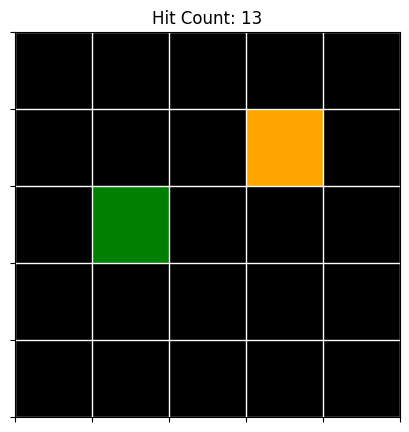

In [7]:
# Grid space (e.g. the value 10 provides a 10 x 10 grid space)
grid_space_xy = 5

# Model
model = Model(grid_space_xy, grid_space_xy)

# Figure settings
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()
im = model.plot()

# Function to update the figure
def update(frame):
    model.update()
    im.set_array(model.plot().get_array())
    plt.xticks(np.arange(0, grid_space_xy+1, 1), labels='')
    plt.yticks(np.arange(0, grid_space_xy+1, 1), labels='')
    plt.title("Hit Count: {}".format(model.hit_count))
    plt.grid(linewidth=1, color='white')
    return im

# Model iterations
num_iter = 200
for i in range(num_iter):
    update(1)
    display(fig)
    clear_output(wait=True)
    if i < num_iter - 1:
        plt.clf()
    else:
        pass

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-04-24 16:07:56
Python Version: 3.10.13
-----------------------------------
